## Linear Regression
In this notebook we are going to implement Linear Regression on a small dataset.

In [339]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are using a small dataset from [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). This a data about Cricket Chirps Vs. Temperature. We will use linear regression to fit model.

In [340]:
# loading data
data = pd.read_excel('slr02.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Now we look into data we see there are two columns X and Y. 

were X = chirps/sec for the striped ground cricket

and Y = temperature in degrees Fahrenheit

In [341]:
# visualise data
data

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [342]:
# data we got are in pandas dataframe format
# we need to cast it in numpy array for calulations
X = np.array(data.X)
y = np.array(data.Y)

Now we have two arrays. One containing input features and other array has output features

In [343]:
# visualise casted data
X,y

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

In [344]:
# function for plotting data points
def plot_points(X, y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

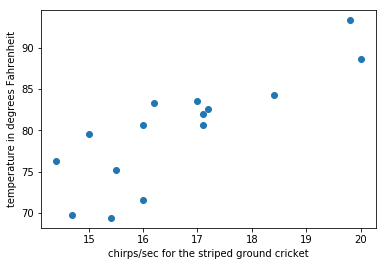

In [345]:
# plot data points
plot(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit")

We have initialised theta to a random value.
We then create hypothesis for model which is linear in nature

In [346]:
# initialised theta
theta = np.random.rand(2,1)
# hypothesis of model
def prediction(X, theta):
    """Predicts output feature given input feature and theta"""
    return theta[0] + theta[1] * X

We want to draw our line of regression to see if fit data correctly.

In [347]:
# plots line of regression
def draw_line(theta):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = prediction(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

We want to plot data points and line of regession on same plot to see if we are progressing as we train our model

In [348]:
# plots points and lines
def draw_points_and_lines(X, y, xlabel, ylabel, theta):
    plot(X, y, xlabel, ylabel)
    draw_line(theta)

Now without training our model let's were the line of  regression lies

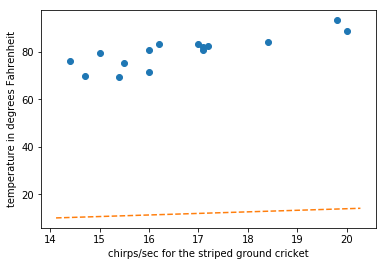

In [349]:
# draw line of regression without traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

Cost function givies us measure of how much we are error we have

we need to minimize  it. Here we have used sqared error cost function which basically sums over all the sqared error of indivisual points

In [350]:
# cost function
m = len(X)
def cost(X, y, theta):
    """Returns cost"""
    return (1/(2*m)) * np.sum((prediction(X, theta) - y) ** 2)

In [351]:
# initial cost without trraining model
cost(X, y, theta)

2350.290280082

Now we will minimize cost with help of **gradient descent**

In [352]:
# minimize cost
def gradient_descent(X, y, theta, alpha, steps):
    for i in range(steps):
        old_cost = cost(X, y, theta)
        temp0 = theta[0] - alpha * ((1/m) * np.sum(prediction(X, theta) - y))
        temp1 = theta[1] - alpha * ((1/m) * np.dot((prediction(X, theta) - y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, y, theta)
        if new_cost > old_cost:
            print("COST INCREASING")
        else:
            print("Cost Decresing", new_cost)

In [353]:
# train model of 100 iterations
gradient_descent(X, y, theta, alpha=0.001, steps=100)

Cost Decresing 1219.3536244146896
Cost Decresing 634.7485210948471
Cost Decresing 332.553752252047
Cost Decresing 176.34285836004662
Cost Decresing 95.5941170312075
Cost Decresing 53.85335840882001
Cost Decresing 32.27665107786299
Cost Decresing 21.12316833538863
Cost Decresing 15.35767083738098
Cost Decresing 12.37733687016985
Cost Decresing 10.836712839537793
Cost Decresing 10.040305325906589
Cost Decresing 9.628599070812008
Cost Decresing 9.415753033303735
Cost Decresing 9.305702048723482
Cost Decresing 9.248788001653732
Cost Decresing 9.219341561951877
Cost Decresing 9.204093709953566
Cost Decresing 9.196185408750686
Cost Decresing 9.19207107709486
Cost Decresing 9.18991792904875
Cost Decresing 9.18877855879737
Cost Decresing 9.188163232237063
Cost Decresing 9.187818795451593
Cost Decresing 9.187614387827399
Cost Decresing 9.18748236474557
Cost Decresing 9.187387759271871
Cost Decresing 9.187312496258441
Cost Decresing 9.187247232279034
Cost Decresing 9.187187137519015
Cost Decresi

After training we can clearly see we have reduced cost and have found appropriate value of theta

In [354]:
# cost after traing model
cost(X, y, theta)

9.183364310575083

In [355]:
# value of theta after training 
theta

array([[1.0128707],
       [4.7314317]])

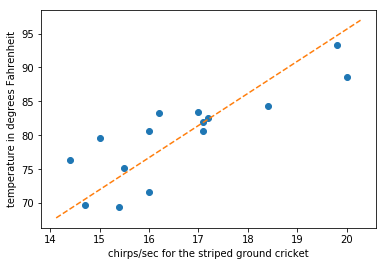

In [356]:
# regression line after traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

We can clearly see we have fitted line to the points. Thus we have successfully used linear regression to train a model.